In [1]:
import numpy as np
import pandas as pd
import os
import sys
#import fileinput

In [2]:
#remove temporary file if it exists
filePath = 'temporary_df.txt'
if os.path.exists(filePath):
    os.remove(filePath)
else:
    None

In [3]:
 # will be used to write teh output file
site='Paranal'
prod='PROD6'

In [4]:
temp = open(filePath,"w")
temp.write("object_class pos_x pos_y pos_z sphere_radius tel_id telescope_name class_id geo_code")
temp.write("\n")
with open(f'/home/irene/divergent/PROD6/INPUTS_CTA_{prod}-array-{site}.inc', 'r') as f:
    for line in f:
        # Use continue so your code doesn't become a nested mess.
        if line[0] == '*':
            continue  
        # if this check passes, we can assume line is not a comment.
        else: 
            line=line.replace('(',' ')            
            line=line.replace(')',' ')
            line=line.replace('#',' ')
            line = " ".join(line.split())
            temp.write(f'{line}\n')
            

temp.close()

In [5]:
df = pd.read_csv ('temporary.txt', header=0, sep=' ', engine='python')
# removing my temporary file
os.remove(filePath)

In [6]:
#cm to m conversion
df.pos_x=df['pos_x'].apply(lambda x: x*10**(-2))
df.pos_y=df['pos_y'].apply(lambda x: x*10**(-2))
df.pos_z=df['pos_z'].apply(lambda x: x*10**(-2))
df.sphere_radius=df['sphere_radius'].apply(lambda x: x*10**(-2))
df

,object_class,pos_x,pos_y,pos_z,sphere_radius,tel_id,telescope_name,class_id,geo_code
0,TELESCOPE,-20.64,-64.82,34.00,12.50,ID=1,LSTS,1,A1A
1,TELESCOPE,79.99,-0.77,29.00,12.50,ID=2,LSTS,2,B0A
2,TELESCOPE,-19.40,65.20,31.00,12.50,ID=3,LSTS,3,A3A
3,TELESCOPE,-120.03,1.15,33.00,12.50,ID=4,LSTS,4,Y0A
4,TELESCOPE,-0.02,-0.00,24.00,9.15,ID=5,MSTS,1,A0A
...,...,...,...,...,...,...,...,...,...
82,TELESCOPE,957.02,189.86,5.25,3.00,ID=83,SSTS,46,N2A
83,TELESCOPE,-1025.15,-510.28,59.25,3.00,ID=84,SSTS,47,P5A
84,TELESCOPE,-1015.16,529.86,13.25,3.00,ID=85,SSTS,48,P6A
85,TELESCOPE,1015.13,-529.86,31.25,3.00,ID=86,SSTS,49,N3A


In [7]:
fileName=f'CTA-{prod}_TelescopePositions{site}.txt'
if os.path.exists(fileName):
    os.remove(fileName)
else:
    None
output=open(fileName,'a+')
for i in range(len(df.telescope_name)):
    if 'LST' in df.telescope_name[i]:
        focal_lenght= 28
        camera_radius=2.15
    elif 'MST' in df.telescope_name[i]:
        focal_lenght= 16
        camera_radius=3.85
    elif 'SST' in df.telescope_name[i]:
        focal_lenght= 5.6
        camera_radius=4.45
    line=(f'{round(df.pos_x[i],2)} {round(df.pos_y[i],2)} {round(df.pos_z[i],2)} {focal_lenght} {camera_radius}')
    output.write(f'{line}\n')
output.close()

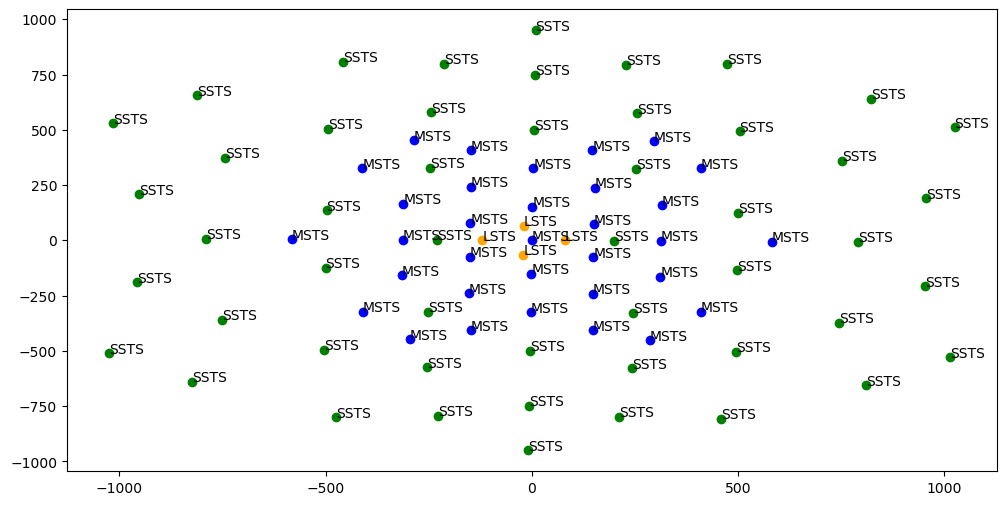

In [8]:
import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(12,6))
for i,tel in enumerate(df.telescope_name):
    plt.annotate(tel,(df.pos_x[i],df.pos_y[i]+1))
    if 'LST' in tel: 
        plt.scatter(df.pos_x[i],df.pos_y[i],color='orange')
    elif 'SST' in tel: 
        plt.scatter(df.pos_x[i],df.pos_y[i],color='green')
    else:
        plt.scatter(df.pos_x[i],df.pos_y[i],color='blue')

